# Comparar Modelos

Este notebook compara a performance de vários modelos utilizando a base Diabetes da Pima-Indians.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# load dataset
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
names = ['gest', 'glic', 'sang', 'skin', 'insul', 'mass', 'familia', 'idade', 'conf']
filename = '../bases/pima-indians-diabetes.data.csv'
df = read_csv(filename, names=names)
df.head()

,gest,glic,sang,skin,insul,mass,familia,idade,conf
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
array = df.values
X = array[:,0:8]
Y = array[:,8]
print(len(X))
print(len(Y))

768
768


In [4]:
# Preparar os modelos que serão usados
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [19]:
# Avaliar a acurácia de cada Modelo
results = []
names = []
scoring = 'accuracy'

In [20]:
acuracia = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    acuracia.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.778640 (0.047350)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.675957 (0.045635)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


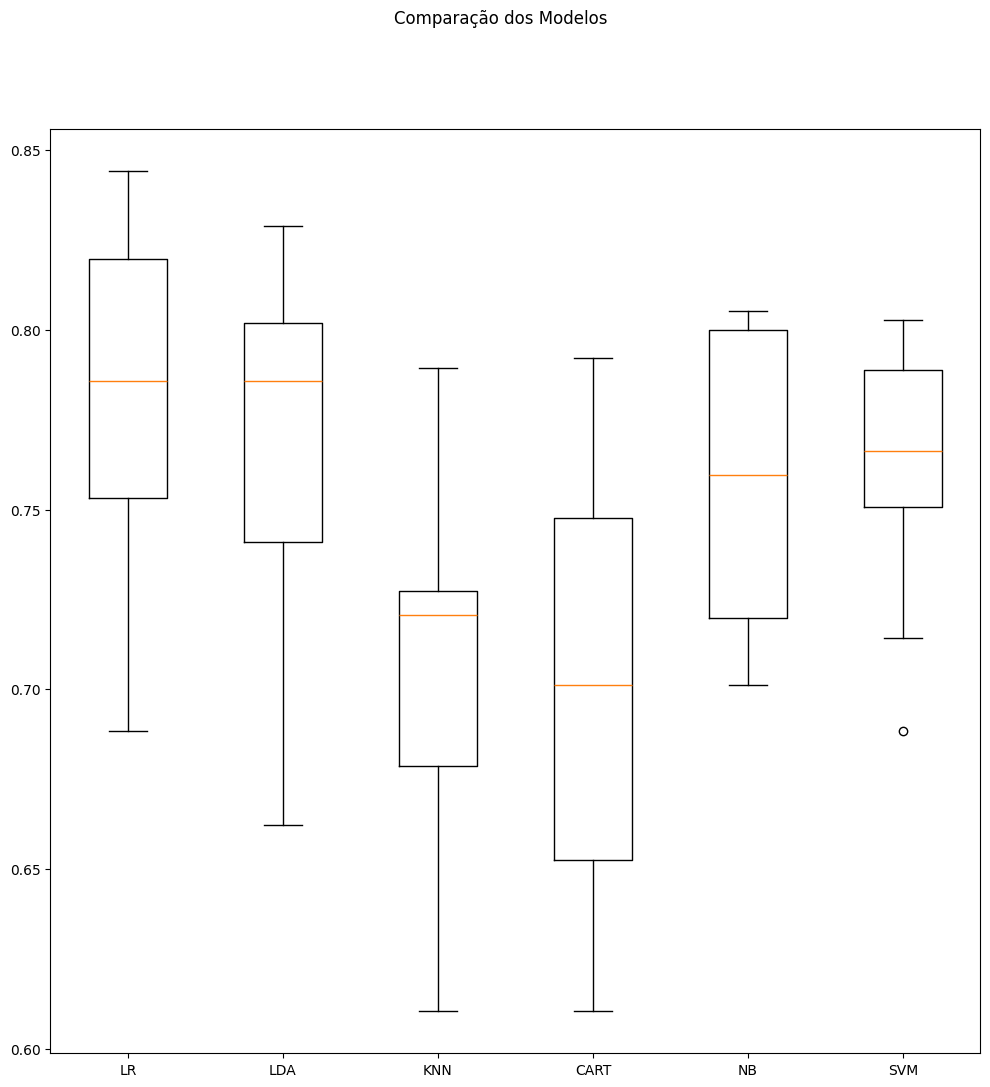

In [7]:
# boxplot algorithm comparison
fig = pyplot.figure(figsize = (12,12))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

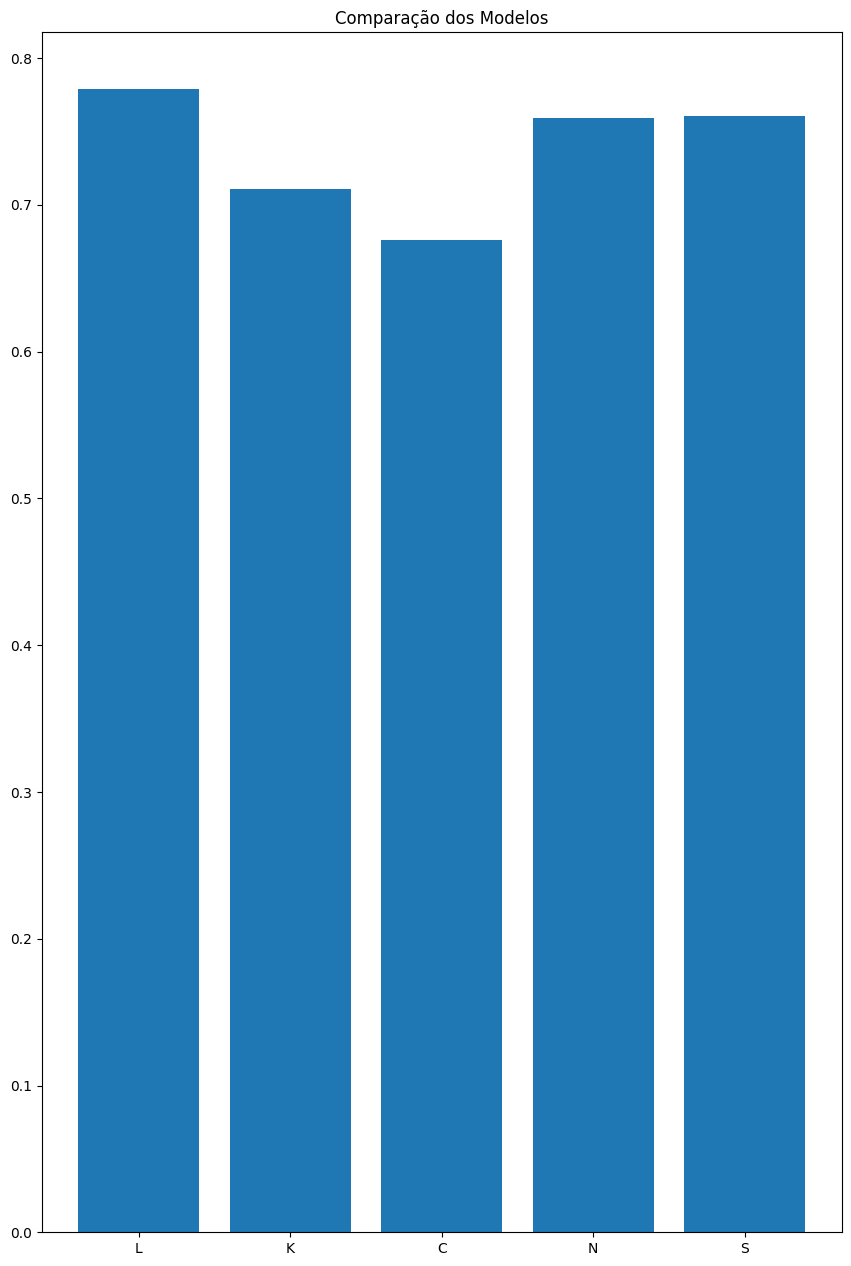

In [21]:
fig = pyplot.figure(figsize = (8,4))
axes = fig.add_axes([0.0, 0.0, 1.0, 3.0])
axes.set_title('Comparação dos Modelos')
axes.bar([item[0] for item in names], acuracia)
pyplot.show()